#                                              Indian Premier League

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹475 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.

There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season. The 2020 season has been indefinitely suspended due to the ongoing COVID-19 pandemic .

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

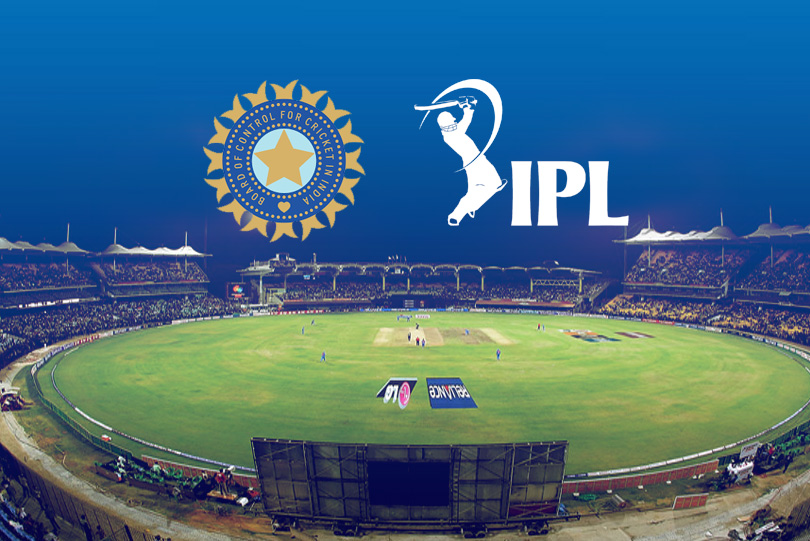

In [100]:
from IPython.display import Image
Image(filename="IPL Image.jpg")

In [101]:
score=pd.read_csv("deliveries.csv",header=0)
match=pd.read_csv("matches.csv",header=0)
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [102]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [103]:
print(score.shape)
print(match.shape)

(150460, 21)
(636, 18)


In [104]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [105]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 59.7+ KB


## Data Cleaning

In [107]:
score.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [108]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

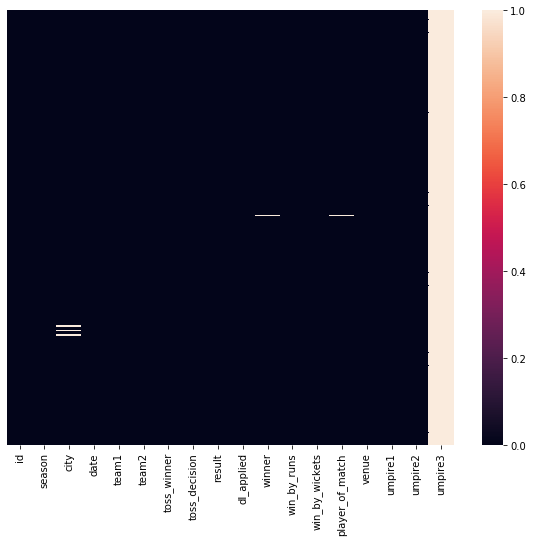

In [109]:
plt.figure(figsize=(10,8))
sns.heatmap(match.isnull(),yticklabels=False)

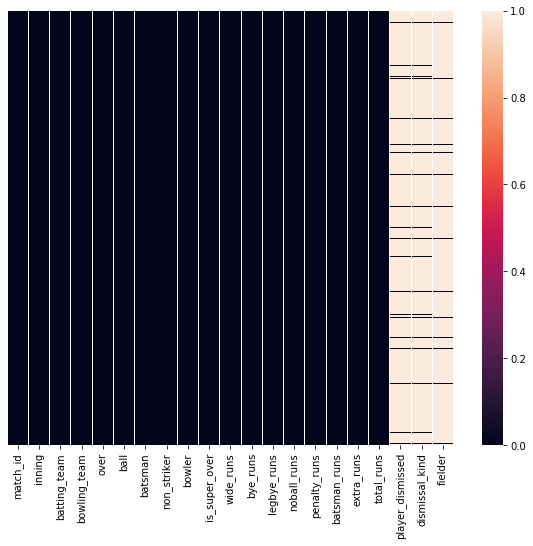

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(score.isnull(),yticklabels=False)

 Since umpire3 contains all null values we can remove the column

In [111]:
match.drop("umpire3",axis=1,inplace=True)

player_dismissed, dismissal_kind, fielder have null values because not on every ball a player is out

get list of team names and replace with short forms

In [112]:
match["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [113]:
match.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
        ['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

score.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
        ['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

## Exploratory Data Analysis

In [114]:
df=match.iloc[[match['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [188]:
df=match.iloc[[match['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


Kolkata Knight Riders(KKR) defeated Gujarat Lions(GL) with the highest wickets difference

## Number of matches per sessions

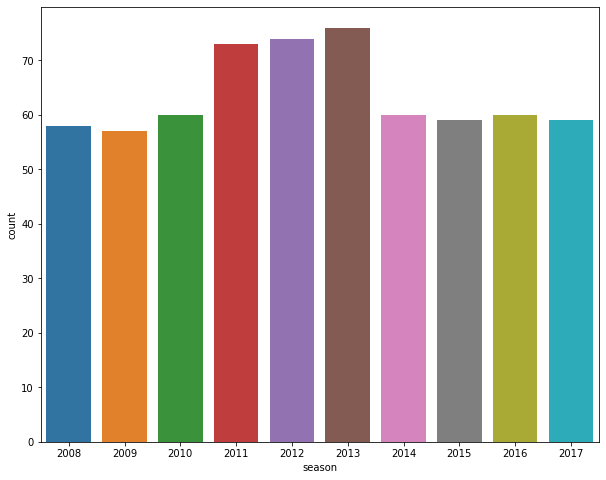

In [116]:
#lets see how many matches are being played every season
plt.figure(figsize=(10,8))
sns.countplot(x='season',data=match)
plt.show()

The year 2013 has most number of matches and 2010 less number of matches

# Most number of winning team

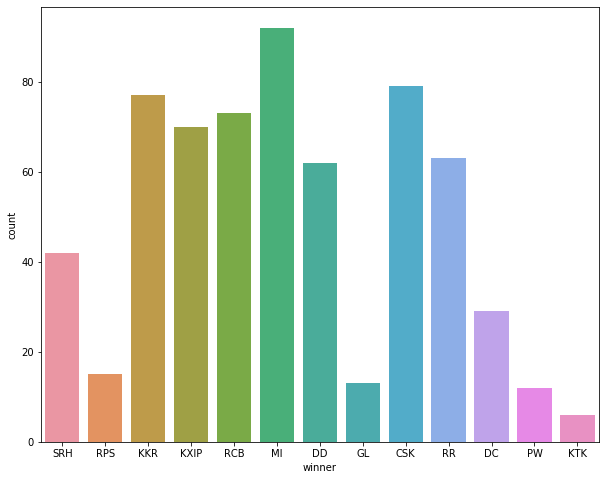

In [117]:
# By this graph you ca nsee that Mumbai Indians have won most of the matches in the IPL

plt.figure(figsize=(10,8))
sns.countplot(x='winner',data=match)
plt.show()

## Is Toss Winner Also the Match Winner?

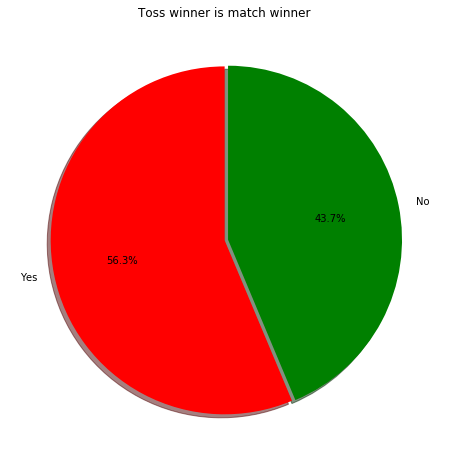

In [118]:
plt.figure(figsize=(10,8))
df=match[match['toss_winner']==match['winner']]
slices=[len(df),577-len(df)]
labels=['Yes','No']
plt.pie(slices,labels=labels,shadow=True,explode=(0,0.02),autopct='%1.1f%%',colors=['r','g'],startangle=90)

plt.title("Toss winner is match winner")
plt.show()

It is not really the case it seems. The chance is 50-50 for both the teams.

## Favorite Grounds

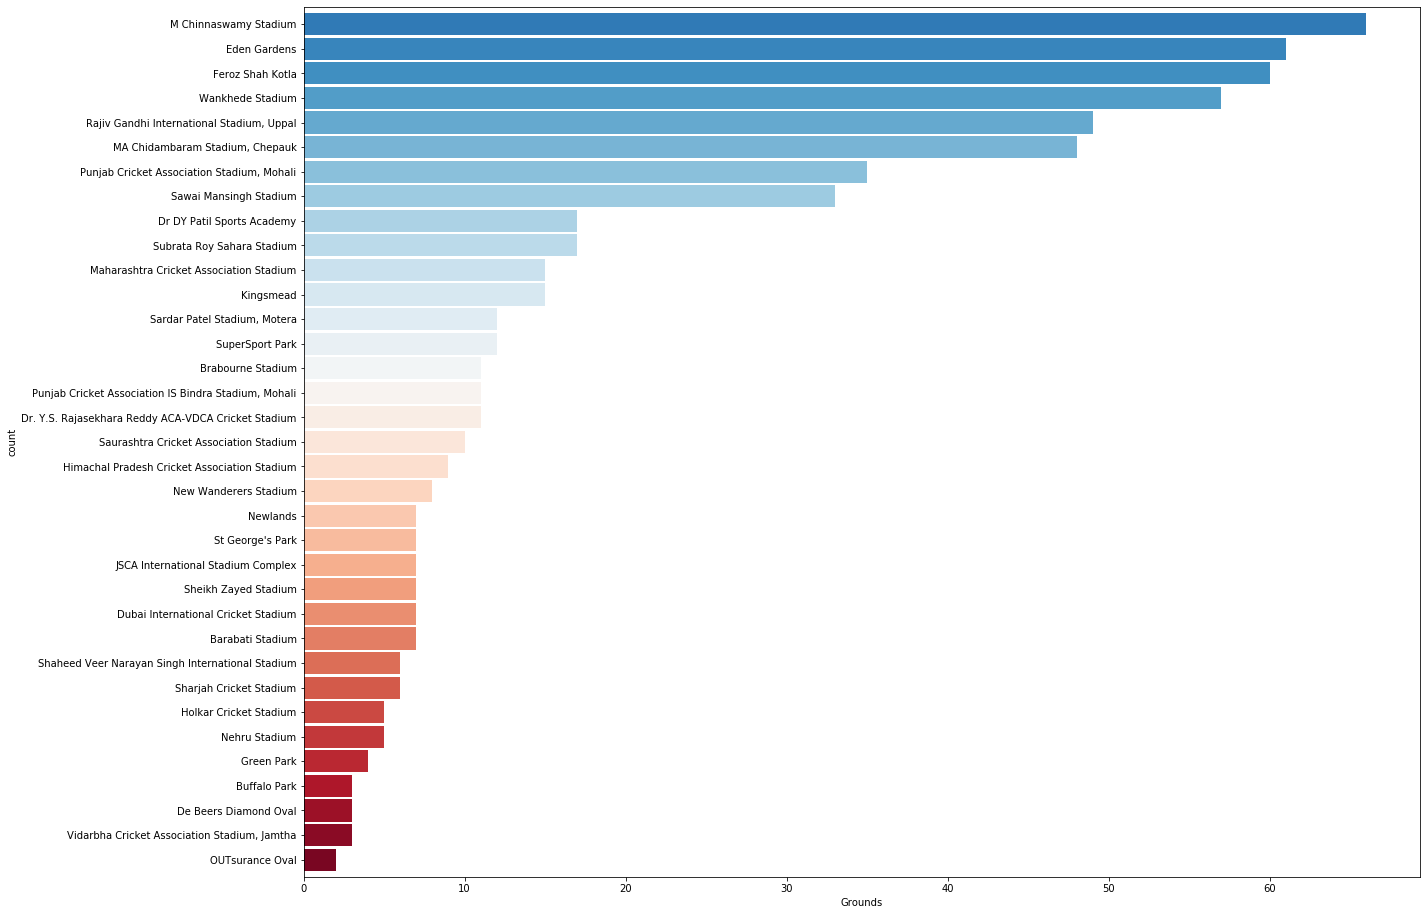

In [119]:
plt.subplots(figsize=(20,16))
ax=match['venue'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdBu',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()


Top cities where the matches are held

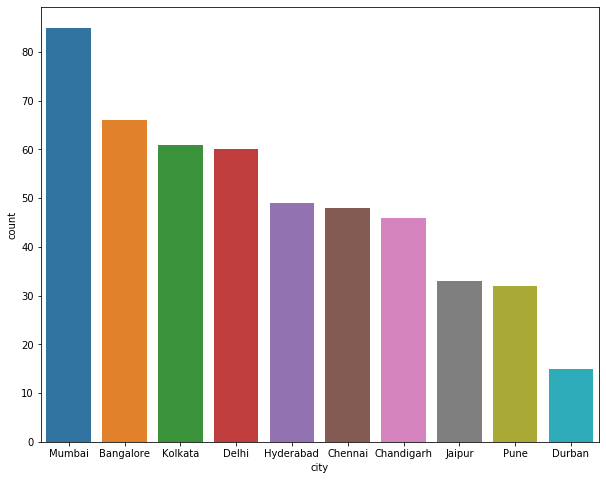

In [120]:
plt.figure(figsize=(10,8))
fav_cities=match['city'].value_counts().reset_index()
fav_cities.columns=['city','count']
sns.barplot(x='city',y='count',data=fav_cities[:10])
plt.show()

Mumbai is the top city where most number of matches have occured

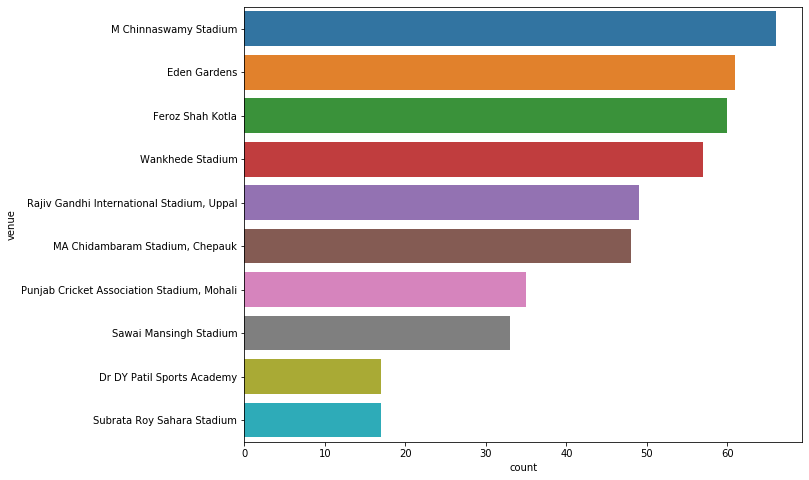

In [121]:
plt.figure(figsize=(10,8))
fav_ground=match['venue'].value_counts().reset_index()
fav_ground.columns=['venue','count']
sns.barplot(x='count',y='venue',data=fav_ground[:10])
plt.show()

## Toss Decisions

In [122]:
print('toss decision in %\n ', ((match['toss_decision']).value_counts())/577*100)

toss decision in %
  field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


# Toss Decisions across Seasons

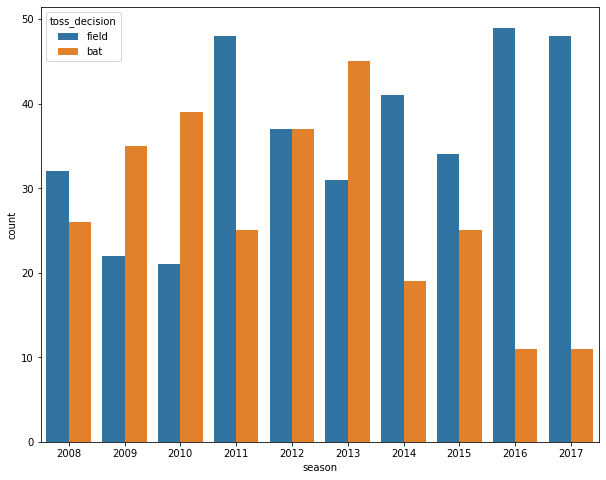

In [123]:
plt.subplots(figsize=(10,8))
sns.countplot(x='season',hue='toss_decision',data=match)
plt.show()

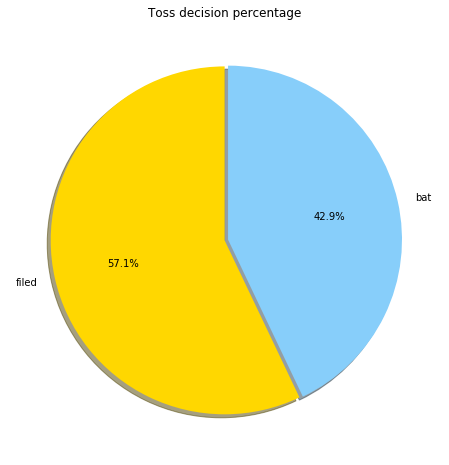

In [124]:
plt.figure(figsize=(10,8))

temp=match['toss_decision'].value_counts()
sizes=temp/temp.sum()*100
labels=['filed','bat']
plt.pie(sizes,labels=labels,shadow=True,explode=(0,0.02),autopct='%1.1f%%',colors=['gold', 'lightskyblue'],startangle=90)
plt.title("Toss decision percentage")
plt.show()

So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution

## Maximum Toss Winners

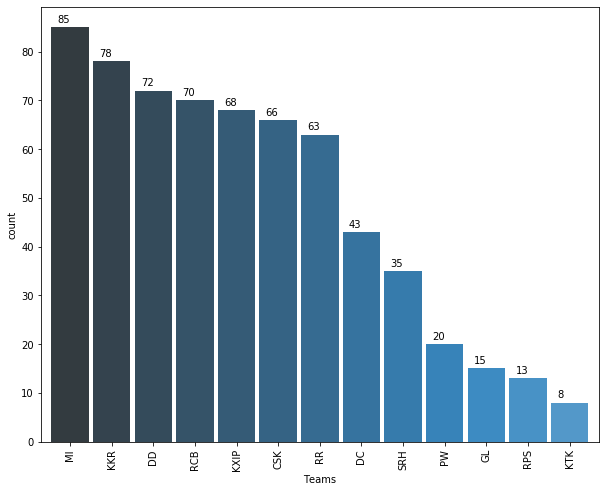

In [127]:
plt.subplots(figsize=(10,8))
ax=match['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('Blues_d',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

ax.set_xlabel('Teams')
ax.set_ylabel('count')
plt.show()

## Maximum Man Of Matches

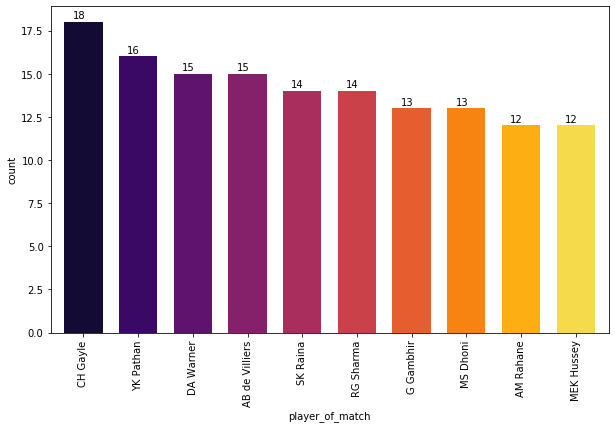

In [133]:
plt.subplots(figsize=(10,6))
ax=match['player_of_match'].value_counts().head(10).plot.bar(width=0.7,color=sns.color_palette('inferno',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.2))

ax.set_xlabel('player_of_match')
ax.set_ylabel('count')
plt.show()

## Winning Year

In [163]:
for i in range(2008,2018):
    df=((match[match['season']==i]).iloc[-1])
    print(df[[1,10]].values)

[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']
[2017 'MI']


## Top players of the IPL

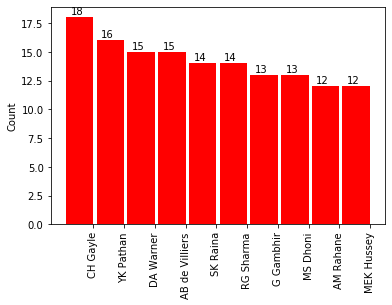

In [178]:
player=match.player_of_match.value_counts()[:10]
labels=np.array(player.index)
ind=np.arange(len(labels))
width=0.9
fig, ax=plt.subplots()
reacts=ax.bar(ind,np.array(player),width=width,color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## Most boundries of the player

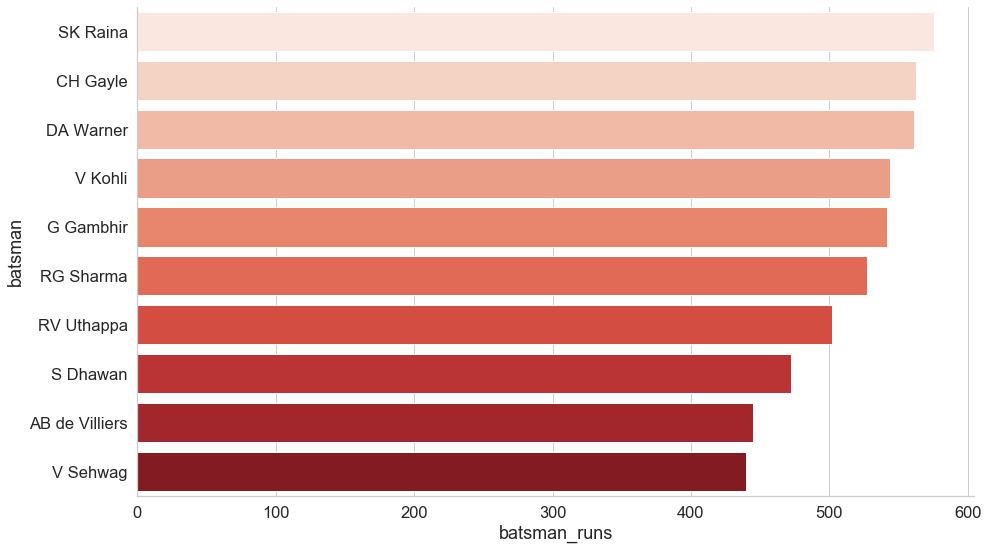

In [187]:
data=score[(score['batsman_runs']==4) | (score['batsman_runs']==6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')

plt.subplots(figsize=(15,9))
sns.set_style('whitegrid')
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10],palette="Reds")

